In [1]:
import pandas as pd

path = r"C:\Aakarshit\coding\AI and ML Full Syllabus\Regression\transfusion.data.txt"
df = pd.read_csv(path)

df.head()
# view first few rows
df



,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [2]:
df.columns = [
    "Recency",
    "Frequency",
    "Monetary",
    "Time",
    "Donated"
]


In [3]:
X = df.drop("Donated", axis=1)
y = df["Donated"]


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    criterion="gini",      
    max_depth=5,
    min_samples_split=5,           # prevents overfitting
    random_state=42
)

dt.fit(X_train, y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [6]:
y_pred = dt.predict(X_test)


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [8]:
a= accuracy_score(y_test,y_pred)
print('Accuracy:', a)

Accuracy: 0.78


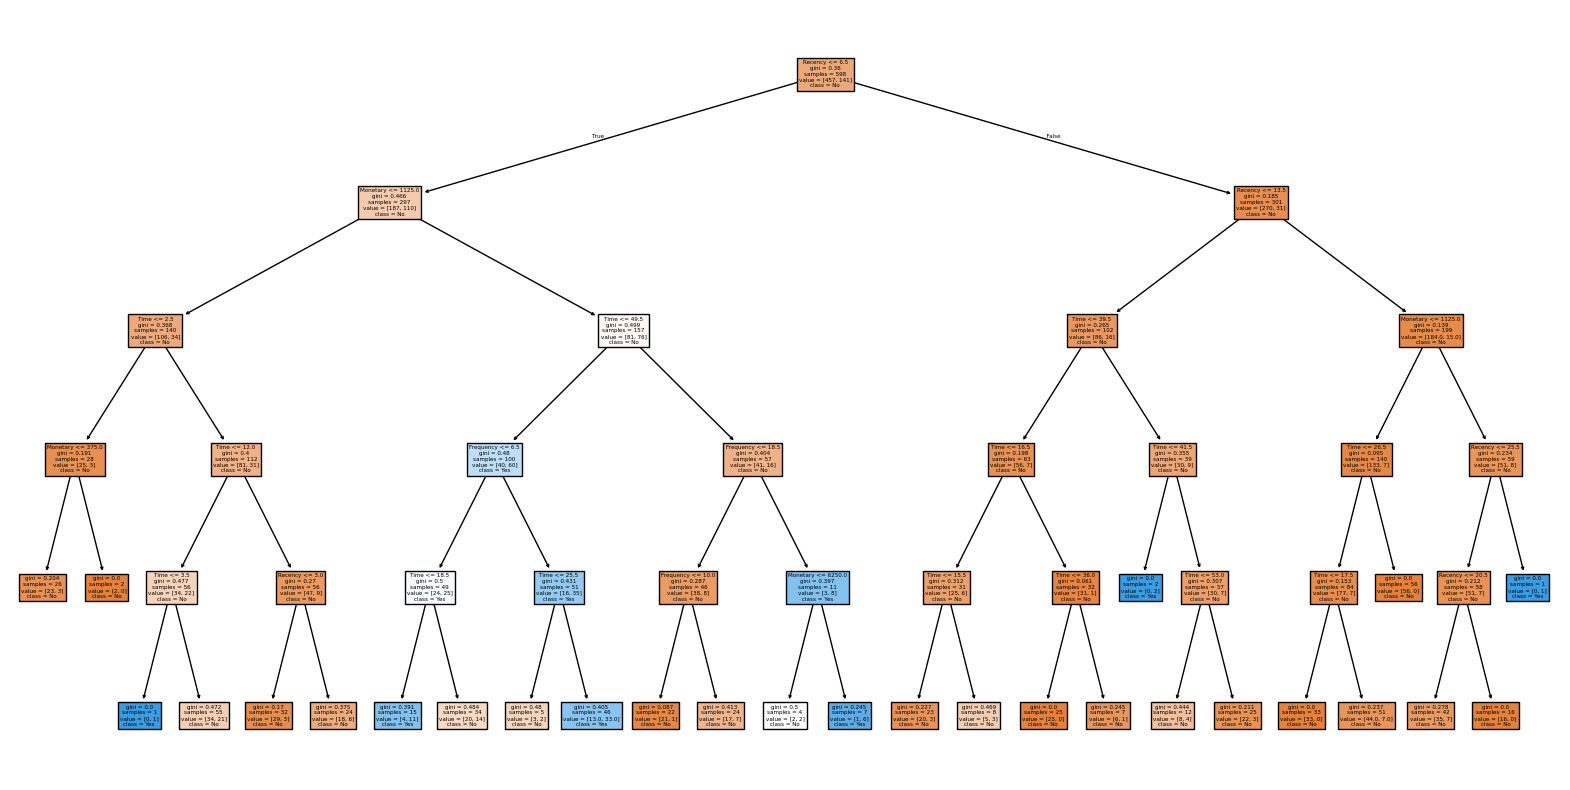

In [9]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt, filled = True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

# Hyperparameter Tuning

In [10]:
params = [
    {'criterion': 'gini', 'max_depth':5, 'min_samples_split':5},
    {'criterion': 'gini', 'max_depth':10, 'min_samples_split':5},
    {'criterion': 'entropy', 'max_depth':5, 'min_samples_split':5},
    {'criterion': 'entropy', 'max_depth':8, 'min_samples_split':6}
]

In [11]:
from sklearn.metrics import confusion_matrix
for param in params:
    clf = DecisionTreeClassifier(criterion = param['criterion'],
                                 max_depth = param['max_depth'],
                                 min_samples_split=param['min_samples_split'],
                                 random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Params: {param}")
    print(f'Accuracy: {accuracy:.2f}')
    print(confusion_matrix(y_test, y_pred))

Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}
Accuracy: 0.78
[[108   5]
 [ 28   9]]
Params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}
Accuracy: 0.66
[[88 25]
 [26 11]]
Params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}
Accuracy: 0.79
[[104   9]
 [ 23  14]]
Params: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 6}
Accuracy: 0.71
[[97 16]
 [27 10]]


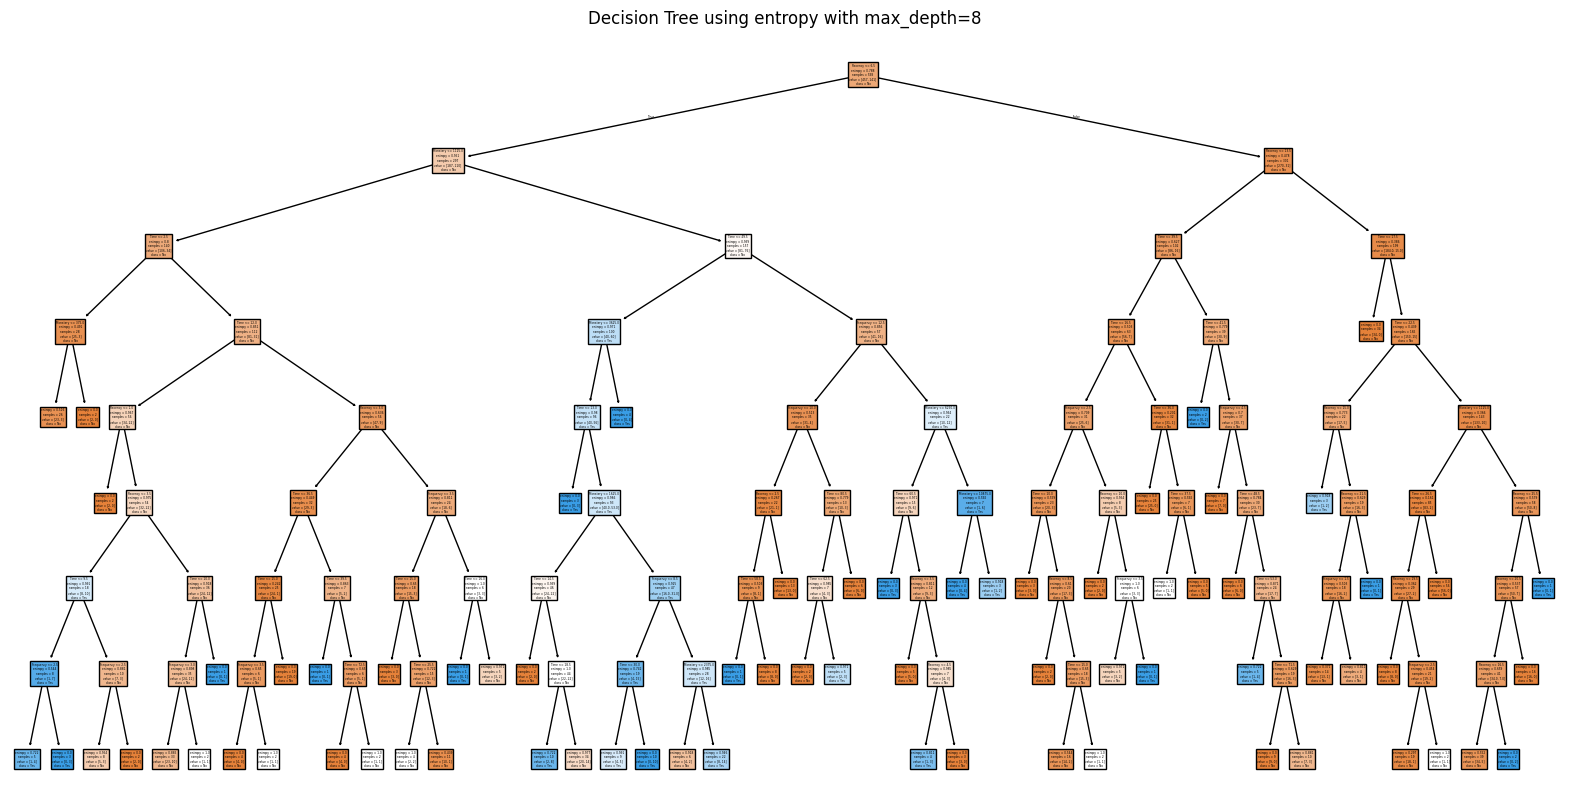

In [12]:
 # Visualize the tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title(f"Decision Tree using {param['criterion']} with max_depth={param['max_depth']}")
plt.show()